# LAB3 HomeTask Activities

Activity-1

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

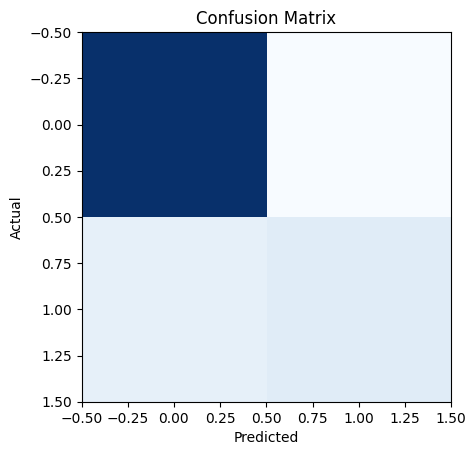

C:\Users\fatim\AppData\Local\Temp\ipykernel_4356\1357298722.py:69: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


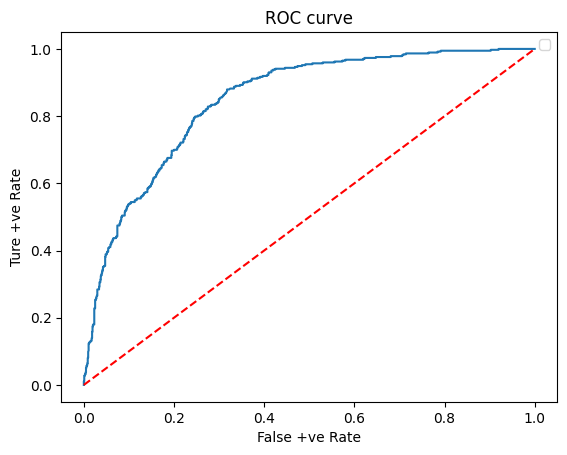

In [9]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#1. LOADING AND Preprocessing

data = pd.read_csv("./Telco Customer Churn.csv")
print(data.head())

# Selecting features
data = data[["tenure", "MonthlyCharges", "Contract", "Churn", "InternetService"]]
print(data.head())

# Label encoding
le = LabelEncoder()
data["Contract"] = le.fit_transform(data["Contract"])
data["InternetService"] = le.fit_transform(data["InternetService"])
data["Churn"] = le.fit_transform(data["Churn"])

# Splitting dataset
X=  data[["tenure", "MonthlyCharges", "Contract", "InternetService"]]
y = data["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2, random_state=42)

#2. Training the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

#3. Evaluating the model
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
y_pred = model.predict(X_test)

# Calculations
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy", accuracy)
print("Precision", precision)
print("recall", recall)
print("f1 score", f1)

# 4. Confusion metrics & Roc curve
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Condusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC CUrve
y_prob = model.predict_proba(X_test)[: ,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc (fpr, tpr)

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], "r--")
plt.title("ROC curve")
plt.xlabel("False +ve Rate")
plt.ylabel("Ture +ve Rate")
plt.legend()
plt.show()


Activity-2

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

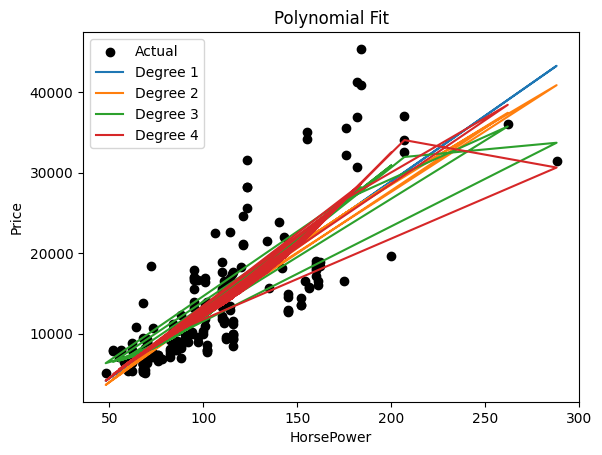

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split

# loading dataset

cars = pd.read_csv("./Car Price Prediction.csv")
print(cars.head())
cars = cars[["enginesize", "highwaympg", "horsepower", "price"]]

# columns
X = cars[["enginesize", "highwaympg", "horsepower"]]
y = cars["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2, random_state=42)

#2. Training the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

#3. Evaluating the model
y_prediction = linear_model.predict(X_test)

# Calculations
means = mean_squared_error(y_test, y_prediction)
r2 = r2_score(y_test, y_prediction)

print("Linear Regression MSE:", means)
print("Linear Regression R square:", r2)

# Polynomial regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

for degree in [2,3,4]:
    linear_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    linear_model.fit(X_train, y_train)
    y_prediction = linear_model.predict(X_test)
    
    mse= mean_squared_error(y_test, y_prediction)
    r2 = r2_score(y_test, y_prediction)
    print(f"Degree {degree} MSE: {mse:.2f}")
    
# plotting
import numpy as np
import matplotlib.pyplot as plt

X_hp = cars[["horsepower"]]
y_hp = cars["price"]



plt.scatter(X_hp, y_hp, color="black", label= "Actual")

for degree in [1,2,3,4]:
    linear_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    linear_model.fit(X_hp, y_hp)
    y_plot = linear_model.predict(X_hp)
    plt.plot(X_hp, y_plot, label= f"Degree {degree}")
    
    mse= mean_squared_error(y_test, y_prediction)
    r2 = r2_score(y_test, y_prediction)
    print(f"Degree {degree} MSE: {mse:.2f}")

plt.title("Polynomial Fit")
plt.xlabel("HorsePower")
plt.ylabel("Price")
plt.legend()
plt.show()